# 텐서플로우 (Tensorflow)

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/11/TensorFlowLogo.svg/1200px-TensorFlowLogo.svg.png" width="300">

- 가장 널리 쓰이는 딥러닝 프레임워크 중 하나

- 구글이 주도적으로 개발하는 플랫폼

- 파이썬, C++ API를 기본적으로 제공하고,  
  자바스크립트(JavaScript), 자바(Java), 고(Go), 스위프트(Swift) 등 다양한 프로그래밍 언어를 지원

- tf.keras를 중심으로 고수준 API 통합 (2.x 버전)

- TPU(Tensor Processing Unit) 지원
  - TPU는 GPU보다 전력을 적게 소모, 경제적
  
  - 일반적으로 32비트(float32)로 수행되는 곱셈 연산을 16비트(float16)로 낮춤

## 텐서플로우 아키텍쳐

<img src="https://developers.google.com/machine-learning/crash-course/images/TFHierarchy.svg">

<sub>출처: https://developers.google.com/machine-learning/crash-course/first-steps-with-tensorflow/toolkit</sub>

## 텐서플로우 시작하기

In [2]:
import numpy as np
import tensorflow as tf

tf.__version__

'2.4.1'

In [2]:
# Check cpu & gpu
from tensorflow.python.client import device_lib

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
        print(device_lib.list_local_devices())
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

1 Physical GPUs, 1 Logical GPUs
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 4013365596807773171
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6910041152
locality {
  bus_id: 1
  links {
  }
}
incarnation: 1610089361952312722
physical_device_desc: "device: 0, name: GeForce RTX 3070, pci bus id: 0000:07:00.0, compute capability: 8.6"
]


In [3]:
a=tf.constant(2)
print(type(a))
b=tf.Variable(a)
print(type(b))

<class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'tensorflow.python.ops.resource_variable_ops.ResourceVariable'>


### Tensorflow Constant의 선언과 속성
- tf.constant(v, dtype)이용
- 타입(Type): `string`, `float32`, `float16`, `int32`, `int8` 등
- 형상(Shape): 0, 1, 2차원 등의 데이터 차원 
- 축(Rank): 차원의 개수

### 텐서의 차원과 연산

In [4]:
a = tf.constant(2)
print(a)
print(tf.rank(a))
a_float = tf.constant(2, dtype=tf.float32)
print(a_float)

tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(2.0, shape=(), dtype=float32)


In [5]:
b = tf.constant([2,3], dtype=tf.float32)
print(b)
print(b.shape)
print(b.numpy())
print(tf.rank(b))

tf.Tensor([2. 3.], shape=(2,), dtype=float32)
(2,)
[2. 3.]
tf.Tensor(1, shape=(), dtype=int32)


In [6]:
c = tf.zeros([3,4])
print(c)
print(tf.rank(c))
print()

tf.Tensor(
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]], shape=(3, 4), dtype=float32)
tf.Tensor(2, shape=(), dtype=int32)



In [7]:
d = tf.random.uniform([2,3,4])
print(d)
print(d.numpy())
print(d.shape)
print(tf.rank(d))

tf.Tensor(
[[[0.5743537  0.344499   0.63387406 0.7992084 ]
  [0.37003744 0.2726587  0.891894   0.3892467 ]
  [0.4117589  0.17945182 0.41857183 0.92034507]]

 [[0.92461133 0.8371502  0.899896   0.6670574 ]
  [0.00931907 0.12323642 0.457873   0.09668934]
  [0.00815558 0.76367784 0.31814837 0.13228226]]], shape=(2, 3, 4), dtype=float32)
[[[0.5743537  0.344499   0.63387406 0.7992084 ]
  [0.37003744 0.2726587  0.891894   0.3892467 ]
  [0.4117589  0.17945182 0.41857183 0.92034507]]

 [[0.92461133 0.8371502  0.899896   0.6670574 ]
  [0.00931907 0.12323642 0.457873   0.09668934]
  [0.00815558 0.76367784 0.31814837 0.13228226]]]
(2, 3, 4)
tf.Tensor(3, shape=(), dtype=int32)


In [8]:
e = tf.constant('Hello')
print(e)
print(tf.rank(e))

tf.Tensor(b'Hello', shape=(), dtype=string)
tf.Tensor(0, shape=(), dtype=int32)


### 난수 생성

In [9]:
rand = tf.random.uniform([1],0,1)
print(rand)
print(tf.rank(rand))

tf.Tensor([0.7710868], shape=(1,), dtype=float32)
tf.Tensor(1, shape=(), dtype=int32)


In [10]:
rand = tf.random.normal([1,2],0,1)
print(rand)
print(tf.rank(rand))

tf.Tensor([[1.242716   0.79325825]], shape=(1, 2), dtype=float32)
tf.Tensor(2, shape=(), dtype=int32)


In [11]:
rand = tf.random.normal([3,2],mean=1,stddev=2)
print(rand)
print(tf.rank(rand))

tf.Tensor(
[[ 1.3559465  -0.3928517 ]
 [ 2.4240482   0.27113587]
 [-2.8805017   3.604424  ]], shape=(3, 2), dtype=float32)
tf.Tensor(2, shape=(), dtype=int32)


### 즉시 실행 모드 (Eager Mode) 지원
- 즉시 실행모드를 통해 텐서플로우를 파이썬처럼 사용할 수 있음

- 1.x 버전에서는 '그래프'를 생성하고, 초기화 한 뒤에 세션을 통해 **값을 흐르게 하는 작업**을 진행해야함


In [12]:
a = tf.constant(3)
b = tf.constant(2)

In [13]:
print(tf.add(a,b))
print(a+b)
print(tf.subtract(a,b))
print(a-b)
print(tf.multiply(a,b))
print(a*b)
print(tf.divide(a,b))
print(a/b)

tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(1.5, shape=(), dtype=float64)
tf.Tensor(1.5, shape=(), dtype=float64)


### 텐서 플로우 ↔ 넘파이
- `numpy()`
- `tf.convert_to_tensor()`

In [14]:
c=(a+b).numpy()
print(c)

5


In [15]:
c_square = np.square(c, dtype=np.float32)
print(c_square)
print(c*c)
print('c type: {}\nc_square type: {}'.format(type(c),type(c_square)))

25.0
25
c type: <class 'numpy.int32'>
c_square type: <class 'numpy.float32'>


In [16]:
c_square_tensor = tf.convert_to_tensor(c_square)
print(c_square_tensor)
print(type(c_square_tensor))

tf.Tensor(25.0, shape=(), dtype=float32)
<class 'tensorflow.python.framework.ops.EagerTensor'>


### 넘파이처럼 사용하기


In [17]:
t = tf.constant([[1.,2.,3.], [4.,5.,6.]])
print(t.shape)
print(t.dtype)

(2, 3)
<dtype: 'float32'>


In [18]:
print(t[:,1:])

tf.Tensor(
[[2. 3.]
 [5. 6.]], shape=(2, 2), dtype=float32)


In [19]:
t[...,1, tf.newaxis]

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[2.],
       [5.]], dtype=float32)>

In [20]:
t+10

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[11., 12., 13.],
       [14., 15., 16.]], dtype=float32)>

In [21]:
tf.square(t)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)>

### 타입 변환
- 텐서의 기본 dtype
  - float형 텐서: `float32`
  - int형 텐서: `int32`

- 연산시 텐서의 타입을 맞춰줘야 함
  - `float32` ~ `float32`
  - `int32` ~ `int32`
  - `flot32` ~ `int32` (x)

- 타입변환에는 `tf.cast()` 사용

In [22]:
a = tf.constant(2)
b = tf.constant(2.0)
c = tf.constant(2.0, dtype=tf.float64)
print(a)
print(b)
print(c)

tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(2.0, shape=(), dtype=float32)
tf.Tensor(2.0, shape=(), dtype=float64)


In [23]:
# print(a+b)
# print(b*c)

In [24]:
d = b+tf.cast(c, dtype=tf.float32)
print(d)

tf.Tensor(4.0, shape=(), dtype=float32)


### @tf.function
- Compiles a function into a callable TensorFlow graph.
- 자동으로 그래프를 생성(Auto Graph)
- 그래프로 변환하여 사용 -> GPU 연산 가능
- 파이썬으로 구성된 함수를 텐서플로우의 그래프 형태로 다루고 싶을 때 사용가능
- 속도향상

In [3]:
%%timeit
@tf.function
def my_func(x):
  return x**2 - 10*x +3

print(my_func(2))
print(my_func(tf.constant(2)));

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Unable to locate the source code of <function inner.<locals>.my_func at 0x00000232A5BED670>. Note that functions defined in certain environments, like the interactive Python shell do not expose their source code. If that is the case, you should to define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Unable to locate the source code of <function inner.<locals>.my_func at 0x00000232A5BED670>. Note that functions defined in certain environments, lik

tf.Tensor(-13, shape=(), dtype=int32)
tf.Tensor(-13, shape=(), dtype=int32)
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Unable to locate the source code of <function inner.<locals>.my_func at 0x000002329C63B280>. Note that functions defined in certain environments, like the interactive Python shell do not expose their source code. If that is the case, you should to define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Unable to locate the source code of <function inner.<locals>.my_func at 0

tf.Tensor(-13, shape=(), dtype=int32)
tf.Tensor(-13, shape=(), dtype=int32)
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Unable to locate the source code of <function inner.<locals>.my_func at 0x000002329C63B280>. Note that functions defined in certain environments, like the interactive Python shell do not expose their source code. If that is the case, you should to define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Unable to locate the source code of <function inner.<locals>.my_func at 0

In [4]:
%%timeit
def my_func1(x):
  return x**2 - 10*x +3

print(my_func1(2))
print(my_func1(tf.constant(2)))

-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype

tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int

-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype

-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype

tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int

tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int

tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int

tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int

-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype

tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int

tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int

tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int

tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int

tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int

-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype

-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype=int32)
-13
tf.Tensor(-13, shape=(), dtype

### 변수 생성

- `tf.Variable`
- 딥러닝 모델 학습 시, 그래프 연산이 필요할 때 사용

In [27]:
x = tf.Variable(20.0)
print(x)

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=20.0>


### Autograd (자동 미분)

- `tf.GradientTape` API를 사용
- `tf.Variable` 같은 일부 입력에 대한 기울기 계산
  - 기본적으로 한번만 사용됨
- 변수가 포함된 연산만 기록

In [28]:
x = tf.Variable(3.0)

with tf.GradientTape() as tape:
  y = x**2

dy_dx = tape.gradient(y,x)
dy_dx.numpy()

6.0

In [29]:
# x2 = tf.Variable(4.0)
# dy_dx = tape.gradient(y,x2)
# dy_dx.numpy()

In [30]:
weights = tf.Variable(tf.random.normal((3,2)),name='weights')
biases = tf.Variable(tf.zeros(2),name='biases')
x = [[1.,2.,3.]]

with tf.GradientTape(persistent=True) as tape:
  y = x @ weights * biases
  loss = tf.reduce_mean(y**2)

In [31]:
[dl_dw, dl_db] = tape.gradient(loss, [weights, biases])

print(weights.shape)
print(dl_dw.shape)

(3, 2)
(3, 2)


In [32]:
weights2 = tf.Variable(tf.random.normal((3,2)),name='weights')
biases2 = tf.Variable(tf.zeros(2),name='biases')
x2 = [[4.,5.,6.]]

In [33]:
[dl_dw2, dl_db2] = tape.gradient(loss, [weights2, biases2])

print(weights.shape)
print(dl_dw.shape)

(3, 2)
(3, 2)


In [34]:
del tape  # 사용하지 않을 때 메모리에서 제거.

## 간단한 신경망 구조 



### 뉴런
- 입력 → 연산 → 활성화함수 → 출력

In [35]:
import numpy as np
def sigmoid(x):
  return 1/(1+np.exp(-x))

def Neuron(x, W, b=0):
  z = x*W + b
  return sigmoid(z)

In [36]:
x = tf.random.normal((1,2), 0, 1)
W = tf.random.normal((1,2), 0,1)

print('x.shape:', x.shape)
print('W.shape:', W.shape)

print('x:', x)
print('W:', W)

print(Neuron(x,W))

x.shape: (1, 2)
W.shape: (1, 2)
x: tf.Tensor([[-0.08461547  0.8557259 ]], shape=(1, 2), dtype=float32)
W: tf.Tensor([[-1.564684   -0.55592734]], shape=(1, 2), dtype=float32)
[[0.53305084 0.38326296]]


In [37]:
x = tf.random.normal((2,1), 0, 1)
W = tf.random.normal((2,1), 0,1)

print('x.shape:', x.shape)
print('W.shape:', W.shape)

print('x:', x)
print('W:', W)

print(Neuron(x,W))

x.shape: (2, 1)
W.shape: (2, 1)
x: tf.Tensor(
[[ 0.29166928]
 [-0.3799755 ]], shape=(2, 1), dtype=float32)
W: tf.Tensor(
[[-0.27316684]
 [ 1.7083399 ]], shape=(2, 1), dtype=float32)
[[0.48009193]
 [0.34318623]]


### 퍼셉트론 학습 알고리즘 (가중치 업데이트)

## $\qquad w^{(next step)} = w + \eta \ (y - \tilde{y}) \ x$

- $w \ $: 가중치

- $\eta \ $ : 학습률

- $y \ $ : 정답 레이블

- $\tilde{y} \ $: 예측 레이블


In [38]:
x = 1
y = 0
W = tf.random.normal([1],0,1)
print(Neuron(x,W))
print('y: ',y)

[0.67715085]
y:  0


In [39]:
for i in range(1000):
  output=Neuron(x, W)
  error=y-output
  W = W + 0.1 * x *error
  if i%100==99:
    print('{}\t{}\t{}'.format(i+1, error, output))

100	[-0.115132]	[0.115132]
200	[-0.05576578]	[0.05576578]
300	[-0.03635647]	[0.03635647]
400	[-0.02687552]	[0.02687552]
500	[-0.02128504]	[0.02128504]
600	[-0.01760644]	[0.01760644]
700	[-0.01500532]	[0.01500532]
800	[-0.01307021]	[0.01307021]
900	[-0.01157501]	[0.01157501]
1000	[-0.01038543]	[0.01038543]


In [40]:
def Neuron2(x, W, bias=0):
  z = tf.matmul(x, W, transpose_b = True) + bias
  return sigmoid(z)

In [41]:
x = tf.random.normal((1,3),0,1)
y = tf.ones(1)
W = tf.random.normal((1,3),0,1)
print(Neuron2(x,W))
print('y: ',y)

[[0.8226528]]
y:  tf.Tensor([1.], shape=(1,), dtype=float32)


In [42]:
for i in range(1000):
  output=Neuron2(x, W)
  error=y-output
  W = W + 0.1 * x *error
  if i%100==99:
    print('{}\t{}\t{}'.format(i+1, error, output))

100	[[0.01700038]]	[[0.9829996]]
200	[[0.00877655]]	[[0.99122345]]
300	[[0.00590831]]	[[0.9940917]]
400	[[0.00445127]]	[[0.9955487]]
500	[[0.00357014]]	[[0.99642986]]
600	[[0.00298005]]	[[0.99701995]]
700	[[0.00255716]]	[[0.99744284]]
800	[[0.00223935]]	[[0.99776065]]
900	[[0.00199169]]	[[0.9980083]]
1000	[[0.00179338]]	[[0.9982066]]


In [43]:
x = tf.random.normal((1,3),0,1)
W = tf.random.normal((1,3),0,1)
bias=tf.zeros((1,1))
y = tf.ones(1,)

print('x\t: {}\nweights\t: {}\nbias\t: {}'.format(x, W, bias))

x	: [[-0.5197085 -1.2854842  0.2880301]]
weights	: [[-0.4232342   0.86137676 -0.6831881 ]]
bias	: [[0.]]


In [44]:
for i in range(1000):
  output=Neuron2(x, W, bias=bias)
  error=y-output
  W = W + 0.1 * x *error
  bias = bias + 0.1* error
  if i%100==99:
    print('{}\t{}\t{}'.format(i+1, error, output))

100	[[0.03676438]]	[[0.9632356]]
200	[[0.01766366]]	[[0.98233634]]
300	[[0.01158696]]	[[0.98841304]]
400	[[0.00861293]]	[[0.99138707]]
500	[[0.00685102]]	[[0.993149]]
600	[[0.0056864]]	[[0.9943136]]
700	[[0.00485957]]	[[0.99514043]]
800	[[0.00424236]]	[[0.99575764]]
900	[[0.00376397]]	[[0.996236]]
1000	[[0.0033825]]	[[0.9966175]]


In [45]:
print("x\t: {}\nweights\t:{}\nbias\t: {}".format(x, W, bias))

x	: [[-0.5197085 -1.2854842  0.2880301]]
weights	:[[-1.594035  -2.0345685 -0.0343126]]
bias	: [[2.2528028]]


### AND Gate

In [46]:
X = np.array([[1,1],[1,0],[0,1],[0,0]])
Y = np.array([[1],[0],[0],[0]])

W = tf.random.normal([2],0,1)
b = tf.random.normal([1],0,1)

b_x = 1

for i in range(2000):
  error_sum =0
  for j in range(4):
    output = sigmoid(np.sum(X[j]*W)+b_x+b)
    error = Y[j][0] - output
    W = W + 0.1*X[j]*error
    b = b+b_x*error
    error_sum +=error

  if i%200==0:
    print('Epoch {:4d}\tError Sum {}'.format(i, error_sum))

print('\n가중치\t: {}'.format(W))
print('\n편향\t: {}'.format(b))


Epoch    0	Error Sum [-1.2333755]
Epoch  200	Error Sum [-0.01340891]
Epoch  400	Error Sum [-0.00722379]
Epoch  600	Error Sum [-0.00491718]
Epoch  800	Error Sum [-0.00372094]
Epoch 1000	Error Sum [-0.00298999]
Epoch 1200	Error Sum [-0.0024982]
Epoch 1400	Error Sum [-0.00214488]
Epoch 1600	Error Sum [-0.00187865]
Epoch 1800	Error Sum [-0.00167113]

가중치	: [8.265136 8.285486]

편향	: [-13.740178]


In [47]:
# Evaluation

for i in range(4):
  print("X: {} Y: {}   Output: {}".format(X[i], Y[i], sigmoid(np.sum(X[i]*W)+b)))

X: [1 1] Y: [1]   Output: [0.9432376]
X: [1 0] Y: [0]   Output: [0.00417257]
X: [0 1] Y: [0]   Output: [0.00425799]
X: [0 0] Y: [0]   Output: [1.0782413e-06]


### OR Gate

In [48]:
X = np.array([[1,1],[1,0],[0,1],[0,0]])
Y = np.array([[1],[1],[1],[0]])

W = tf.random.normal([2],0,1)
b = tf.random.normal([1],0,1)

b_x = 1

for i in range(2000):
  error_sum =0
  for j in range(4):
    output = sigmoid(np.sum(X[j]*W)+b_x+b)
    error = Y[j][0] - output
    W = W + 0.1*X[j]*error
    b = b+b_x*error
    error_sum +=error

  if i%200==0:
    print('Epoch {:4d}\tError Sum {}'.format(i, error_sum))

print('\n가중치\t: {}'.format(W))
print('\n편향\t: {}'.format(b))


Epoch    0	Error Sum [-0.6902024]
Epoch  200	Error Sum [-0.00416306]
Epoch  400	Error Sum [-0.00229017]
Epoch  600	Error Sum [-0.00158051]
Epoch  800	Error Sum [-0.00120561]
Epoch 1000	Error Sum [-0.00097404]
Epoch 1200	Error Sum [-0.00081665]
Epoch 1400	Error Sum [-0.00070309]
Epoch 1600	Error Sum [-0.00061707]
Epoch 1800	Error Sum [-0.00054967]

가중치	: [8.490873 8.470466]

편향	: [-4.888585]


In [49]:
for i in range(4):
  print("X: {} Y: {}   Output: {}".format(X[i], Y[i], sigmoid(np.sum(X[i]*W)+b)))

X: [1 1] Y: [1]   Output: [0.9999943]
X: [1 0] Y: [1]   Output: [0.9734622]
X: [0 1] Y: [1]   Output: [0.97292984]
X: [0 0] Y: [0]   Output: [0.00747576]


### XOR Gate

In [50]:
import numpy as np
import tensorflow as tf
X = np.array([[1,1],[1,0],[0,1],[0,0]])
Y = np.array([[0],[1],[1],[0]])

W = tf.random.normal([2],0,1)
b = tf.random.normal([1],0,1)

b_x = 1

for i in range(2000):
  error_sum =0
  for j in range(4):
    output = sigmoid(np.sum(X[j]*W)+b_x+b)
    error = Y[j][0] - output
    W = W + 0.1*X[j]*error
    b = b+b_x*error
    error_sum +=error

  if i%200==0:
    print('Epoch {:4d}\tError Sum {}'.format(i, error_sum))

print('\n가중치\t: {}'.format(W))
print('\n편향\t: {}'.format(b))

Epoch    0	Error Sum [-0.37574401]
Epoch  200	Error Sum [-9.351969e-05]
Epoch  400	Error Sum [-4.7683716e-07]
Epoch  600	Error Sum [-1.1920929e-07]
Epoch  800	Error Sum [-1.1920929e-07]
Epoch 1000	Error Sum [-1.1920929e-07]
Epoch 1200	Error Sum [-1.1920929e-07]
Epoch 1400	Error Sum [-1.1920929e-07]
Epoch 1600	Error Sum [-1.1920929e-07]
Epoch 1800	Error Sum [-1.1920929e-07]

가중치	: [ 5.7893616e-01 -2.9057264e-07]

편향	: [-1.2605212]


In [51]:
for i in range(4):
  print("X: {} Y: {}   Output: {}".format(X[i], Y[i], sigmoid(np.sum(X[i]*W)+b)))

X: [1 1] Y: [0]   Output: [0.33590758]
X: [1 0] Y: [1]   Output: [0.33590764]
X: [0 1] Y: [1]   Output: [0.22088416]
X: [0 0] Y: [0]   Output: [0.22088419]


#### XOR 문제에 대하여 단일 뉴론 학습효가가 효과적이 아님을 알 수있다.

In [52]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

np.random.seed(111)

X = np.array([[1,1],[1,0],[0,1],[0,0]])
Y = np.array([[0],[1],[1],[0]])

model = Sequential([Dense(units = 2, activation='sigmoid', input_shape=(2,)),
                    Dense(units = 1, activation='sigmoid')])

model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.1),loss='mse')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 6         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [53]:
history = model.fit(X, Y, epochs = 3000, batch_size=1, verbose=1)

Epoch 1/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.2719
Epoch 2/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.3240
Epoch 3/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2072
Epoch 4/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2644
Epoch 5/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.3076
Epoch 6/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2492
Epoch 7/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.2628
Epoch 8/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2767
Epoch 9/3000
4/4 [==============================] - 0s 1000us/step - loss: 0.2938
Epoch 10/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2409
Epoch 11/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2872
Epoch 12/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2416
Epoch 13/3000
4/4 [===========================

Epoch 203/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2432
Epoch 204/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2539
Epoch 205/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2474
Epoch 206/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2635
Epoch 207/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2644
Epoch 208/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2464
Epoch 209/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2576
Epoch 210/3000
4/4 [==============================] - 0s 24ms/step - loss: 0.2636
Epoch 211/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2436
Epoch 212/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2635
Epoch 213/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2527
Epoch 214/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2484
Epoch 215/3000
4/4 [=======

4/4 [==============================] - 0s 1ms/step - loss: 0.2598
Epoch 405/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2528
Epoch 406/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2403
Epoch 407/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.2348
Epoch 408/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2441
Epoch 409/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2390
Epoch 410/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2554
Epoch 411/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2363
Epoch 412/3000
4/4 [==============================] - 0s 25ms/step - loss: 0.2372
Epoch 413/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2311
Epoch 414/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2393
Epoch 415/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2441
Epoch 416/3000
4/4 [======================

Epoch 606/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2265
Epoch 607/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2384
Epoch 608/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2356
Epoch 609/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2612
Epoch 610/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.2356
Epoch 611/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2323
Epoch 612/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2204
Epoch 613/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2519
Epoch 614/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2318
Epoch 615/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2263
Epoch 616/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2223
Epoch 617/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2200
Epoch 618/3000
4/4 [========

4/4 [==============================] - 0s 1ms/step - loss: 0.2481
Epoch 708/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2163
Epoch 709/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2328
Epoch 710/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2330
Epoch 711/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2126
Epoch 712/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.2206
Epoch 713/3000
4/4 [==============================] - 0s 1000us/step - loss: 0.2207
Epoch 714/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1983
Epoch 715/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2081
Epoch 716/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2461
Epoch 717/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.2321
Epoch 718/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2459
Epoch 719/3000
4/4 [====================

4/4 [==============================] - 0s 1ms/step - loss: 0.1871
Epoch 910/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2105
Epoch 911/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1888
Epoch 912/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1757
Epoch 913/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2540
Epoch 914/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2162
Epoch 915/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2616
Epoch 916/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.1881
Epoch 917/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1618
Epoch 918/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1891
Epoch 919/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2542
Epoch 920/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1959
Epoch 921/3000
4/4 [=======================

4/4 [==============================] - 0s 1ms/step - loss: 0.2084
Epoch 1011/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2562
Epoch 1012/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1625
Epoch 1013/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2626
Epoch 1014/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2434
Epoch 1015/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2565
Epoch 1016/3000
4/4 [==============================] - 0s 1000us/step - loss: 0.1948
Epoch 1017/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2158
Epoch 1018/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2416
Epoch 1019/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.1777
Epoch 1020/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1807
Epoch 1021/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2155
Epoch 1022/3000
4/4 [========

4/4 [==============================] - 0s 1ms/step - loss: 0.2578
Epoch 1111/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.2111
Epoch 1112/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1625
Epoch 1113/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2002
Epoch 1114/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1857
Epoch 1115/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1511
Epoch 1116/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2000
Epoch 1117/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1597
Epoch 1118/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1657
Epoch 1119/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2109
Epoch 1120/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1595
Epoch 1121/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1914
Epoch 1122/3000
4/4 [===========

Epoch 1210/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2129
Epoch 1211/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1577
Epoch 1212/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1239
Epoch 1213/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1238
Epoch 1214/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.1788
Epoch 1215/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1533
Epoch 1216/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1533
Epoch 1217/3000
4/4 [==============================] - 0s 1000us/step - loss: 0.1548
Epoch 1218/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1622
Epoch 1219/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.1788
Epoch 1220/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1788
Epoch 1221/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2490
Epoch 1222/30

4/4 [==============================] - 0s 1ms/step - loss: 0.2294
Epoch 1410/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1253
Epoch 1411/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.2451
Epoch 1412/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1421
Epoch 1413/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2199
Epoch 1414/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1549
Epoch 1415/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2293
Epoch 1416/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.1250
Epoch 1417/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1761
Epoch 1418/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1627
Epoch 1419/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1163
Epoch 1420/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1649
Epoch 1421/3000
4/4 [===========

4/4 [==============================] - 0s 1ms/step - loss: 0.2152
Epoch 1510/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2295
Epoch 1511/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.2191
Epoch 1512/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2105
Epoch 1513/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1497
Epoch 1514/3000
4/4 [==============================] - 0s 1000us/step - loss: 0.1499
Epoch 1515/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1680
Epoch 1516/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1730
Epoch 1517/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1590
Epoch 1518/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1184
Epoch 1519/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1589
Epoch 1520/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1304
Epoch 1521/3000
4/4 [========

4/4 [==============================] - 0s 1ms/step - loss: 0.1610
Epoch 1709/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1336
Epoch 1710/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1804
Epoch 1711/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1608
Epoch 1712/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1577
Epoch 1713/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2023
Epoch 1714/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1175
Epoch 1715/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1797
Epoch 1716/3000
4/4 [==============================] - 0s 24ms/step - loss: 0.1196
Epoch 1717/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1426
Epoch 1718/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1226
Epoch 1719/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1894
Epoch 1720/3000
4/4 [==========

4/4 [==============================] - 0s 1ms/step - loss: 0.1400
Epoch 1908/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1134
Epoch 1909/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0794
Epoch 1910/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0886
Epoch 1911/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1347
Epoch 1912/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1083
Epoch 1913/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0788
Epoch 1914/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1443
Epoch 1915/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0785
Epoch 1916/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1265
Epoch 1917/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0871
Epoch 1918/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1111
Epoch 1919/3000
4/4 [===========

4/4 [==============================] - 0s 1ms/step - loss: 0.1074
Epoch 2008/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0738
Epoch 2009/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1106
Epoch 2010/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0980
Epoch 2011/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0978
Epoch 2012/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0935
Epoch 2013/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0669
Epoch 2014/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0967
Epoch 2015/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0965
Epoch 2016/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0611
Epoch 2017/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0876
Epoch 2018/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0597
Epoch 2019/3000
4/4 [===========

4/4 [==============================] - 0s 1ms/step - loss: 0.0664
Epoch 2108/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0540
Epoch 2109/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0754
Epoch 2110/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0566
Epoch 2111/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0665
Epoch 2112/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0772
Epoch 2113/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0500
Epoch 2114/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0737
Epoch 2115/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0532
Epoch 2116/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0733
Epoch 2117/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0544
Epoch 2118/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0462
Epoch 2119/3000
4/4 [===========

4/4 [==============================] - 0s 1ms/step - loss: 0.0406
Epoch 2307/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0382
Epoch 2308/3000
4/4 [==============================] - 0s 1000us/step - loss: 0.0295
Epoch 2309/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0375
Epoch 2310/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0379
Epoch 2311/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0401
Epoch 2312/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0345
Epoch 2313/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0399
Epoch 2314/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0370
Epoch 2315/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0374
Epoch 2316/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0411
Epoch 2317/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0340
Epoch 2318/3000
4/4 [========

4/4 [==============================] - 0s 1ms/step - loss: 0.0238
Epoch 2506/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0245
Epoch 2507/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0245
Epoch 2508/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0244
Epoch 2509/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0248
Epoch 2510/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0235
Epoch 2511/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0211
Epoch 2512/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0222
Epoch 2513/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0221
Epoch 2514/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0234
Epoch 2515/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0233
Epoch 2516/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0208
Epoch 2517/3000
4/4 [===========

4/4 [==============================] - 0s 1ms/step - loss: 0.0170
Epoch 2705/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0151
Epoch 2706/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0164
Epoch 2707/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0177
Epoch 2708/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0166
Epoch 2709/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0163
Epoch 2710/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0176
Epoch 2711/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0140
Epoch 2712/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0163
Epoch 2713/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0163
Epoch 2714/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0168
Epoch 2715/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0139
Epoch 2716/3000
4/4 [===========

4/4 [==============================] - 0s 1ms/step - loss: 0.0104
Epoch 2904/3000
4/4 [==============================] - 0s 24ms/step - loss: 0.0132
Epoch 2905/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0107
Epoch 2906/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0116
Epoch 2907/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0125
Epoch 2908/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0131
Epoch 2909/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0124
Epoch 2910/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0124
Epoch 2911/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0123
Epoch 2912/3000
4/4 [==============================] - 0s 1000us/step - loss: 0.0103
Epoch 2913/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0124
Epoch 2914/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0119
Epoch 2915/3000
4/4 [=======

In [54]:
model.predict(X)

array([[0.1140402 ],
       [0.89394814],
       [0.89317155],
       [0.0807218 ]], dtype=float32)

### XOR Gate의 'LOSS' 시각화


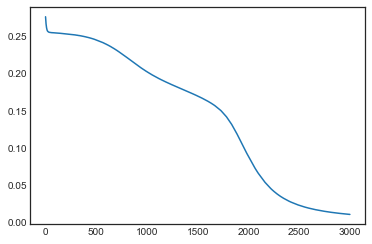

In [60]:
plt.plot(history.history['loss']);
plt.show()

## Matplotlib 시각화 사용